In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
dataset = 'mrpc' # mrpc, manual

folder_input_path = f'/content/drive/My Drive/Colab Notebooks/8_Text_Paraphrasing/data/'
folder_image_path = f'/content/drive/My Drive/Colab Notebooks/8_Text_Paraphrasing/plots/'
csv_file_path = f'fine-tuning-loss-{dataset}.csv'

In [21]:
import pandas as pd

data = pd.read_csv(folder_input_path + csv_file_path)
data.head()

,corpus,learning_rate,epoch,loss,validation loss
0,mrpc,0.00005,1,2.7985,NaN
1,mrpc,0.00005,2,2.5343,NaN
2,mrpc,0.00005,3,2.4228,NaN
3,mrpc,0.00005,4,2.3424,NaN
4,mrpc,0.00005,5,2.2883,NaN


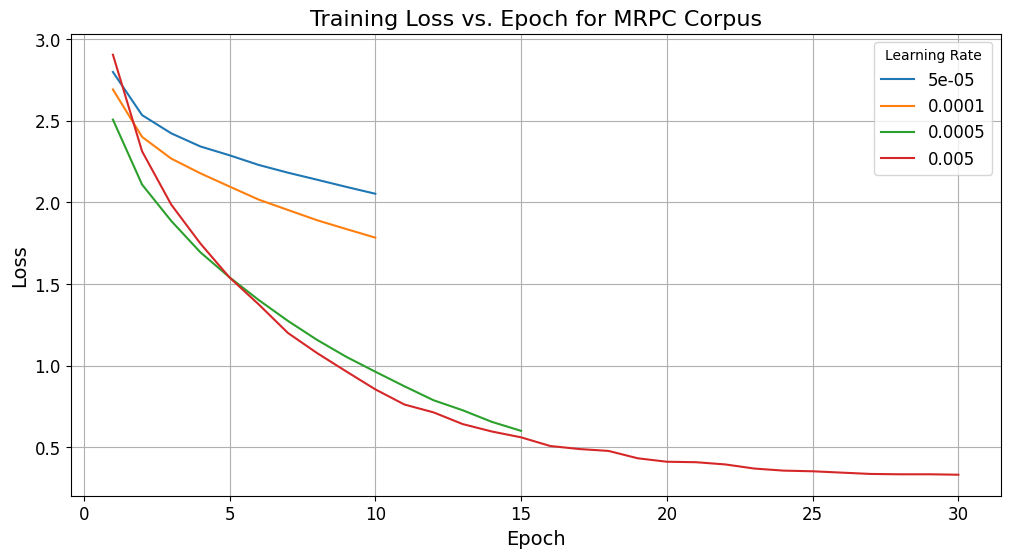

In [22]:
import matplotlib.pyplot as plt

# Recreate the plot with legend labels ordered ascendingly by learning rate
plt.figure(figsize=(12, 6))
# Sort the unique learning rates in ascending order
sorted_lr = sorted(data['learning_rate'].unique())
for lr in sorted_lr:
    # Filter data by learning rate
    lr_data = data[data['learning_rate'] == lr]
    plt.plot(lr_data['epoch'], lr_data['loss'], label=f'{lr}')

# Adding labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title(f'Training Loss vs. Epoch for {data["corpus"][0].upper()} Corpus', fontsize=16)
plt.legend(title='Learning Rate', fontsize=12)
plt.grid()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Exporting the plot as a PNG file
plt.savefig(folder_image_path + f'{dataset}-training-loss-vs-epoch.png', format='png', dpi=300)

# Show the updated plot
plt.show()

In [23]:
# Recalculate the aggregated data with the combined dataset to include the last epoch
aggregated_combined_data_with_epoch = data.groupby(['corpus', 'learning_rate']).agg({
    'epoch': 'max',  # Last epoch
    'loss': 'last',  # Last loss
    'validation loss': 'last'  # Last validation loss
}).reset_index()

# Rename columns for clarity
aggregated_combined_data_with_epoch.columns = ['Corpus Name', 'Learning Rate', 'Last Epoch', 'Last Loss', 'Validation Loss']

# Display the updated table with the last epoch included
aggregated_combined_data_with_epoch



,Corpus Name,Learning Rate,Last Epoch,Last Loss,Validation Loss
0,mrpc,0.00005,10,2.0528,NaN
1,mrpc,0.00010,10,1.7839,NaN
2,mrpc,0.00050,15,0.6007,29.0349
3,mrpc,0.00500,30,0.3320,26.1968
